# Import Libraries

In [1]:
import matplotlib.pyplot as plt 
import numpy as np

import os
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.layers import Dense, Dropout, Flatten, BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPool2D
from tensorflow.keras.models import Sequential

from tensorflow.keras.utils import to_categorical
from keras.regularizers import l1, l2

np.random.seed = 42
os.environ['KMP_DUPLICATE_LIB_OK']='True'
%matplotlib inline

# Load Data

In [2]:
from keras.datasets import cifar10
# let's load data 
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [3]:
print('Shape of X_train : ', X_train.shape)
print('Shape of X_test : ', X_test.shape)

Shape of X_train :  (50000, 32, 32, 3)
Shape of X_test :  (10000, 32, 32, 3)


In [4]:
print(y_train.shape ,y_train )

(50000, 1) [[6]
 [9]
 [9]
 ...
 [9]
 [1]
 [1]]


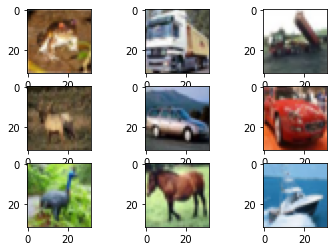

In [5]:
# plot first few images
for i in range(9):
    plt.subplot(331+i)
    plt.imshow(X_train[i])
    plt.show

In [6]:
# 0 --> 255.
X_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [7]:
# Rescale Input
X_train = X_train / 255. 
X_test = X_test / 255.

In [8]:
# to_categorical
y_train = to_categorical(y_train) 
y_test = to_categorical(y_test) 

In [9]:
y_train.shape

(50000, 10)

In [10]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [11]:
mean = X_train.mean(axis=0)
std  = X_train.std(axis=0)

def preprocess_data(data_set):
    data_set -= mean
    data_set /= std
    
    return data_set

X_train = preprocess_data(X_train)
X_test  = preprocess_data(X_test)

In [12]:
X_train.max(), X_train.min()

(2.6250750329255896, -2.2074290237951297)

In [13]:
# Hyperparameters
BATCH_SIZE  = 64
NUM_CLASSES = 10
EPOCHS      = 50

# Assignment 01
- Design your own `deep NN` to classify the `CIFAR 10` images (you can download from keras.dataset) into one of the 10 classes
- Investigate the use of different architectures (`different layers`, `learning rate`, `optimizers`, `loss function`)
- Note you will need to `flatten` the image and use it as your input vector

In [14]:
X_train.shape

(50000, 32, 32, 3)

In [15]:
X_train.shape[1:] # 32 x 32 x 3  --> 3072

(32, 32, 3)

In [16]:
model_1 = Sequential()
model_1.add(Flatten(input_shape=(X_train.shape[1:])))

model_1.add(Dense(4*1024,activation='relu'))
model_1.add(BatchNormalization())
model_1.add(Dense(128,activation='relu'))


model_1.add(Dropout(0.1))

model_1.add(Dense(NUM_CLASSES, activation = 'softmax'))

model_1.compile(loss = 'binary_crossentropy',
               optimizer = keras.optimizers.SGD(),
               metrics =['accuracy'])
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 4096)              12587008  
                                                                 
 batch_normalization (BatchN  (None, 4096)             16384     
 ormalization)                                                   
                                                                 
 dense_1 (Dense)             (None, 128)               524416    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                        

In [17]:
history_1 = model_1.fit(X_train, y_train, 
                        epochs = EPOCHS,
                          batch_size = BATCH_SIZE,
                        validation_split = 0.1)

Epoch 1/50
704/704 [==============================] - 5s 6ms/step - loss: 0.3186 - accuracy: 0.3126 - val_loss: 0.2612 - val_accuracy: 0.4022
Epoch 2/50
704/704 [==============================] - 4s 6ms/step - loss: 0.2607 - accuracy: 0.4154 - val_loss: 0.2474 - val_accuracy: 0.4358
Epoch 3/50
704/704 [==============================] - 4s 6ms/step - loss: 0.2456 - accuracy: 0.4553 - val_loss: 0.2392 - val_accuracy: 0.4560
Epoch 4/50
704/704 [==============================] - 4s 6ms/step - loss: 0.2351 - accuracy: 0.4822 - val_loss: 0.2338 - val_accuracy: 0.4766
Epoch 5/50
704/704 [==============================] - 4s 6ms/step - loss: 0.2265 - accuracy: 0.5066 - val_loss: 0.2299 - val_accuracy: 0.4868
Epoch 6/50
704/704 [==============================] - 4s 6ms/step - loss: 0.2196 - accuracy: 0.5265 - val_loss: 0.2270 - val_accuracy: 0.4952
Epoch 7/50
704/704 [==============================] - 4s 6ms/step - loss: 0.2143 - accuracy: 0.5411 - val_loss: 0.2255 - val_accuracy: 0.4936
Epoch 

In [18]:
model_1.metrics_names

['loss', 'accuracy']

In [19]:
model_1.evaluate(X_train, y_train)

1563/1563 [==============================] - 4s 3ms/step - loss: 0.0846 - accuracy: 0.9025


[0.08459599316120148, 0.9024800062179565]

In [20]:
model_1.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.2193 - accuracy: 0.5447


[0.2192688286304474, 0.544700026512146]

Text(0, 0.5, 'Accuracy')

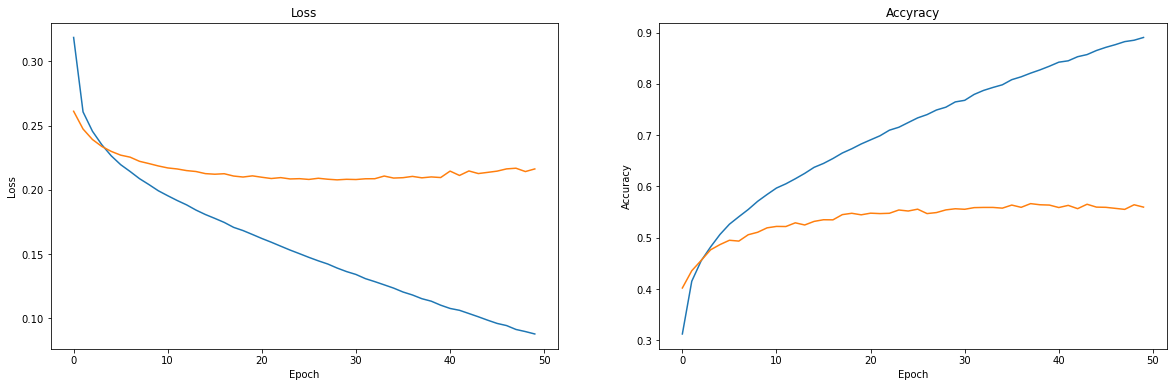

In [21]:
# Plot the training accuracy and loss
fig = plt.figure(figsize=(20,6))
ax = plt.subplot(121)
plt.plot(history_1.history['loss'])
plt.plot(history_1.history['val_loss'])
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')

ax = plt.subplot(122)
plt.plot(history_1.history['accuracy'])
plt.plot(history_1.history['val_accuracy'])
plt.title('Accyracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

# Assignment 02
- Design your `deep convolutional neural network` ( to classify the `CIFAR 10` images into one of the 10 classes
- Invistage the use of different architectures (different `layers`, `kernel sizes`, `pooling`, `learning rate`, `optimizers`, `loss function`)

You have to specify filters and kernel_size. These parameters have no default.

Default padding is valid, which means no zero-padding, and the default strides is (1,1).

# (N - F + 2P)/S   +  1

# P =  (F - 1) / 2

In [16]:
model_2 = Sequential()

model_2.add(Conv2D(32,(3,3),padding="same", input_shape=(X_train.shape[1:]),activation='relu'))
model_2.add(BatchNormalization())
model_2.add(Conv2D(32,(3,3),padding="same",activation='relu'))
model_2.add(MaxPool2D(pool_size=(2,2)))

model_2.add(Conv2D(64,(3,3),padding="same",activation='relu'))
model_2.add(BatchNormalization())
model_2.add(Conv2D(64,(3,3),padding="same",activation='relu'))
model_2.add(MaxPool2D(pool_size=(2,2)))

model_2.add(Conv2D(128,(3,3),padding="same",activation='relu'))
model_2.add(BatchNormalization())
model_2.add(Conv2D(128,(3,3),padding="same",activation='relu'))


model_2.add(MaxPool2D(pool_size=(2,2)))
model_2.add(Dropout(0.2))

model_2.add(Flatten())


model_2.add(Dropout(0.2))

model_2.add(Dense(NUM_CLASSES, activation = 'softmax'))

model_2.compile(loss = 'binary_crossentropy',
               optimizer = keras.optimizers.Adam(learning_rate = 0.0007, beta_1=0.550, beta_2 = 0.999),
               metrics =['accuracy'])
model_2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 batch_normalization_1 (Batc  (None, 16, 16, 64)       2

In [17]:
 history_2 = model_2.fit(X_train, y_train, 
                        epochs = EPOCHS,
                          batch_size = BATCH_SIZE,
                        validation_split = 0.1)

Epoch 1/50
704/704 [==============================] - 12s 13ms/step - loss: 0.2251 - accuracy: 0.5078 - val_loss: 0.2076 - val_accuracy: 0.5588
Epoch 2/50
704/704 [==============================] - 8s 12ms/step - loss: 0.1561 - accuracy: 0.6836 - val_loss: 0.1713 - val_accuracy: 0.6666
Epoch 3/50
704/704 [==============================] - 9s 13ms/step - loss: 0.1284 - accuracy: 0.7473 - val_loss: 0.1837 - val_accuracy: 0.6364
Epoch 4/50
704/704 [==============================] - 9s 13ms/step - loss: 0.1134 - accuracy: 0.7808 - val_loss: 0.1343 - val_accuracy: 0.7530
Epoch 5/50
704/704 [==============================] - 9s 12ms/step - loss: 0.0997 - accuracy: 0.8107 - val_loss: 0.1134 - val_accuracy: 0.7768
Epoch 6/50
704/704 [==============================] - 9s 12ms/step - loss: 0.0902 - accuracy: 0.8324 - val_loss: 0.1755 - val_accuracy: 0.6804
Epoch 7/50
704/704 [==============================] - 8s 11ms/step - loss: 0.0812 - accuracy: 0.8541 - val_loss: 0.1054 - val_accuracy: 0.794

In [18]:
model_2.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.1691 - accuracy: 0.8340


[0.16907304525375366, 0.8339999914169312]

In [19]:
model_2.evaluate(X_train, y_train)

1563/1563 [==============================] - 5s 3ms/step - loss: 0.0205 - accuracy: 0.9825


[0.0204977635294199, 0.9825199842453003]

Text(0, 0.5, 'Accuracy')

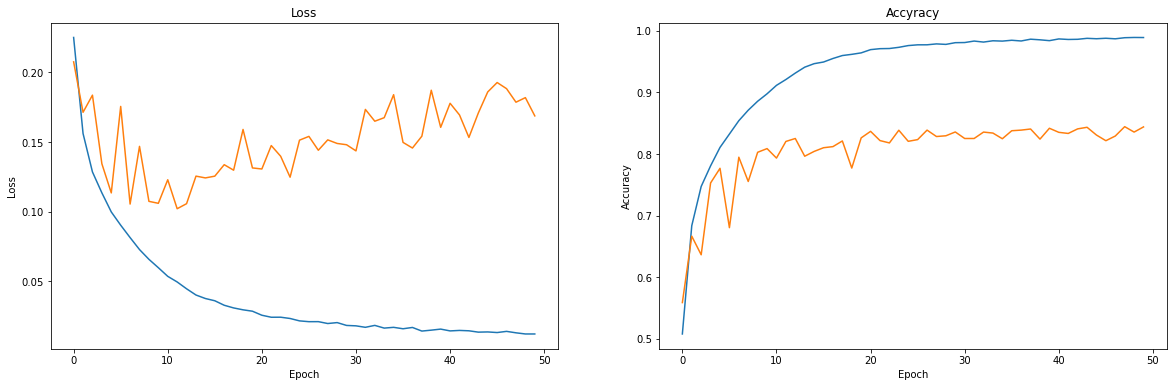

In [20]:
# Plot the training accuracy and loss
fig = plt.figure(figsize=(20,6))
ax = plt.subplot(121)
plt.plot(history_2.history['loss'])
plt.plot(history_2.history['val_loss'])
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')

ax = plt.subplot(122)
plt.plot(history_2.history['accuracy'])
plt.plot(history_2.history['val_accuracy'])
plt.title('Accyracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')


---

# Assignment 03
- Repeat Assignment 1 and 2 using MNIST dataset
- Note that you will need to convert the training labels into categorical using one hot encoding using `to_categorical()` function

# Load Data

In [21]:
from keras.datasets import mnist
# let's load data 
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [22]:
print('Shape of X_train : ', X_train.shape)
print('Shape of X_test : ', X_test.shape)

Shape of X_train :  (60000, 28, 28)
Shape of X_test :  (10000, 28, 28)


In [23]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [24]:
# OR use 'sparse_categorical_crossentropy' in the [LOSS Function]
# to_categorical
y_train = to_categorical(y_train) 
y_test = to_categorical(y_test) 

In [25]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [26]:
y_train.shape

(60000, 10)

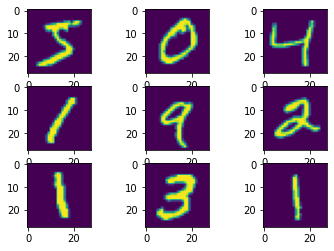

In [27]:
# plot first few images
for i in range(9):
    plt.subplot(331+i)
    plt.imshow(X_train[i])
    plt.show


In [28]:
# Rescale Input
X_train = X_train / 255. 
X_test = X_test / 255.

In [29]:
X_train.max(), X_train.min()

(1.0, 0.0)

In [30]:
# Hyperparameters
BATCH_SIZE  = 64
NUM_CLASSES = 10
EPOCHS      = 50

### ANN 

In [31]:
model_3 = Sequential()
model_3.add(Flatten(input_shape=(X_train.shape[1:])))

model_3.add(Dense(1024,activation='relu'))
model_3.add(Dense(1024,activation='relu'))
model_3.add(Dense(1024,activation='relu'))

model_3.add(Dense(NUM_CLASSES, activation = 'softmax'))

model_3.compile(loss = 'categorical_crossentropy',
               optimizer = keras.optimizers.SGD(),
               metrics =['accuracy'])
model_3.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_1 (Dense)             (None, 1024)              803840    
                                                                 
 dense_2 (Dense)             (None, 1024)              1049600   
                                                                 
 dense_3 (Dense)             (None, 1024)              1049600   
                                                                 
 dense_4 (Dense)             (None, 10)                10250     
                                                                 
Total params: 2,913,290
Trainable params: 2,913,290
Non-trainable params: 0
_________________________________________________________________


In [32]:
history_3 = model_3.fit(X_train, y_train, 
                        epochs = EPOCHS,
                          batch_size = BATCH_SIZE,
                        validation_split = 0.1)

Epoch 1/50
844/844 [==============================] - 3s 4ms/step - loss: 0.8015 - accuracy: 0.8136 - val_loss: 0.3027 - val_accuracy: 0.9177
Epoch 2/50
844/844 [==============================] - 3s 3ms/step - loss: 0.3196 - accuracy: 0.9094 - val_loss: 0.2299 - val_accuracy: 0.9367
Epoch 3/50
844/844 [==============================] - 3s 3ms/step - loss: 0.2596 - accuracy: 0.9254 - val_loss: 0.1969 - val_accuracy: 0.9458
Epoch 4/50
844/844 [==============================] - 3s 3ms/step - loss: 0.2243 - accuracy: 0.9360 - val_loss: 0.1670 - val_accuracy: 0.9545
Epoch 5/50
844/844 [==============================] - 3s 3ms/step - loss: 0.1968 - accuracy: 0.9441 - val_loss: 0.1539 - val_accuracy: 0.9590
Epoch 6/50
844/844 [==============================] - 3s 3ms/step - loss: 0.1754 - accuracy: 0.9498 - val_loss: 0.1419 - val_accuracy: 0.9643
Epoch 7/50
844/844 [==============================] - 3s 3ms/step - loss: 0.1574 - accuracy: 0.9548 - val_loss: 0.1271 - val_accuracy: 0.9658
Epoch 

In [33]:
model_3.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0673 - accuracy: 0.9800


[0.06731879711151123, 0.9800000190734863]

In [34]:
model_3.evaluate(X_train, y_train)

1875/1875 [==============================] - 4s 2ms/step - loss: 0.0143 - accuracy: 0.9978


[0.014334585517644882, 0.997783362865448]

Text(0, 0.5, 'Accuracy')

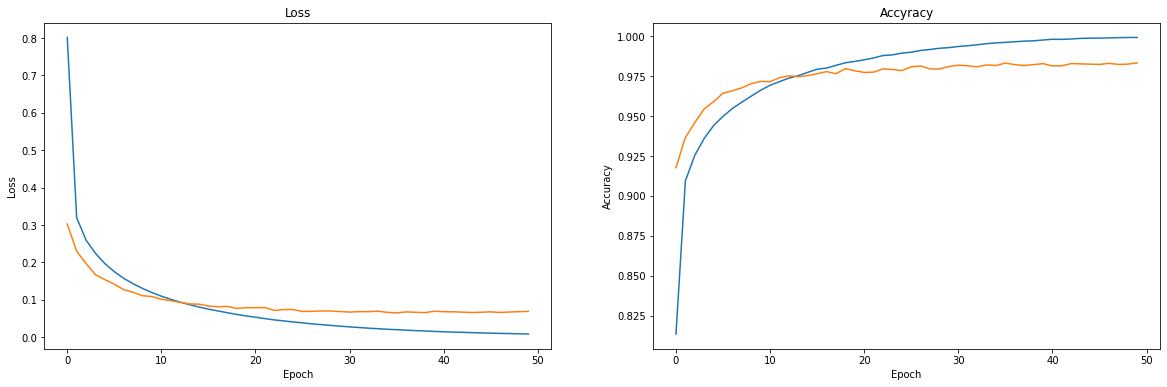

In [35]:
# Plot the training accuracy and loss
fig = plt.figure(figsize=(20,6))
ax = plt.subplot(121)
plt.plot(history_3.history['loss'])
plt.plot(history_3.history['val_loss'])
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')

ax = plt.subplot(122)
plt.plot(history_3.history['accuracy'])
plt.plot(history_3.history['val_accuracy'])
plt.title('Accyracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')


### CNN 

In [36]:
model_4 = Sequential()

model_4.add(Conv2D(32,(3,3),padding="same", input_shape=(28, 28, 1),activation='elu'))
model_4.add(BatchNormalization())
model_4.add(Conv2D(32,(3,3),padding="same",activation='relu'))
model_4.add(MaxPool2D(pool_size=(2,2)))

model_4.add(Conv2D(64,(3,3),padding="same",activation='relu'))
model_4.add(BatchNormalization())
model_4.add(Conv2D(64,(3,3),padding="same",activation='relu'))
model_4.add(MaxPool2D(pool_size=(2,2)))

model_4.add(Conv2D(128,(3,3),padding="same",activation='relu'))
model_4.add(BatchNormalization())
model_4.add(Conv2D(128,(3,3),padding="same",activation='relu'))
model_4.add(MaxPool2D(pool_size=(2,2)))
model_4.add(Dropout(0.2))

model_4.add(Flatten())

model_4.add(Dense(128,activation='relu'))
model_4.add(Dropout(0.1))

model_4.add(Dense(NUM_CLASSES, activation = 'softmax'))

model_4.compile(loss = 'binary_crossentropy',
               optimizer = keras.optimizers.Adam(learning_rate = 0.0007, beta_1=0, beta_2 = 0.9999),
               metrics =['accuracy'])
model_4.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 batch_normalization_3 (Batc  (None, 28, 28, 32)       128       
 hNormalization)                                                 
                                                                 
 conv2d_7 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 batch_normalization_4 (Batc  (None, 14, 14, 64)      

In [37]:
history_4 = model_4.fit(X_train, y_train, 
                        epochs = EPOCHS,
                          batch_size = BATCH_SIZE,
                        validation_split = 0.1)

Epoch 1/50
844/844 [==============================] - 10s 11ms/step - loss: 0.0306 - accuracy: 0.9545 - val_loss: 0.0082 - val_accuracy: 0.9880
Epoch 2/50
844/844 [==============================] - 9s 10ms/step - loss: 0.0088 - accuracy: 0.9880 - val_loss: 0.0087 - val_accuracy: 0.9878
Epoch 3/50
844/844 [==============================] - 9s 10ms/step - loss: 0.0060 - accuracy: 0.9918 - val_loss: 0.0049 - val_accuracy: 0.9935
Epoch 4/50
844/844 [==============================] - 9s 10ms/step - loss: 0.0047 - accuracy: 0.9930 - val_loss: 0.0106 - val_accuracy: 0.9848
Epoch 5/50
844/844 [==============================] - 9s 10ms/step - loss: 0.0038 - accuracy: 0.9946 - val_loss: 0.0073 - val_accuracy: 0.9897
Epoch 6/50
844/844 [==============================] - 9s 10ms/step - loss: 0.0028 - accuracy: 0.9962 - val_loss: 0.0079 - val_accuracy: 0.9898
Epoch 7/50
844/844 [==============================] - 9s 10ms/step - loss: 0.0027 - accuracy: 0.9965 - val_loss: 0.0046 - val_accuracy: 0.993

In [38]:
model_4.evaluate(X_train, y_train)

1875/1875 [==============================] - 6s 3ms/step - loss: 6.6333e-04 - accuracy: 0.9995


[0.0006633277516812086, 0.9994999766349792]

In [39]:
model_4.evaluate(X_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.0060 - accuracy: 0.9953


[0.006044753827154636, 0.9952999949455261]

Text(0, 0.5, 'Accuracy')

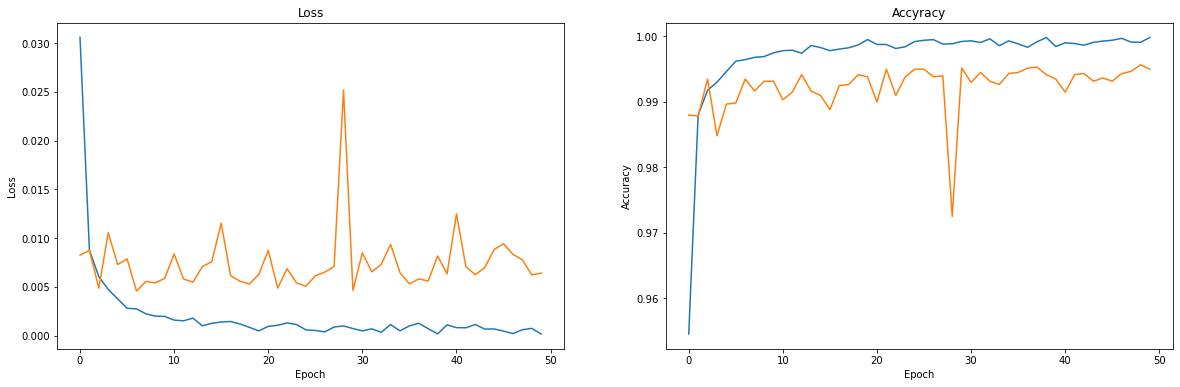

In [40]:
fig = plt.figure(figsize=(20,6))
ax = plt.subplot(121)
plt.plot(history_4.history['loss'])
plt.plot(history_4.history['val_loss'])
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')

ax = plt.subplot(122)
plt.plot(history_4.history['accuracy'])
plt.plot(history_4.history['val_accuracy'])
plt.title('Accyracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')